# Create a valid Directory 

In [1]:
#PATH containing learn, test directories
PATH = "../../data/mnistasjpg/"

In [2]:
'''import os
from random import shuffle
import shutil

for folder in list(os.listdir(PATH)):
    # Check if the train folder is available
    if folder == 'train':
        # Create the valid directory
        os.mkdir(f"{PATH}valid")
            
        # list of classes
        for Class in list(os.listdir(f"{PATH}train")):
            filesList = os.listdir(f"{PATH}train/{Class}")
            print(f"Size of class {Class}:", len(filesList))
            p = 0.2
            validSize = int(len(filesList)*p)
            print("Size of valid:", validSize)
            # Shuffle the list of files
            #shuffle(filesList)
            validFiles = []
            counter = 0
            for file in filesList:
                if counter < validSize:
                    validFiles.append(file)
                counter = counter+1
            
            # Create a new directory for each class
            os.mkdir(f"{PATH}valid/{Class}")
                
            for file in validFiles:
                shutil.move(f"{PATH}train/{Class}/{file}", f"{PATH}valid/{Class}")
                
print("Done")

Size of class 0: 4132
Size of valid: 826
Size of class 1: 4684
Size of valid: 936
Size of class 2: 4177
Size of valid: 835
Size of class 3: 4351
Size of valid: 870
Size of class 4: 4072
Size of valid: 814
Size of class 5: 3795
Size of valid: 759
Size of class 6: 4137
Size of valid: 827
Size of class 7: 4401
Size of valid: 880
Size of class 8: 4063
Size of valid: 812
Size of class 9: 4188
Size of valid: 837
Done


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
# what's in our PATH?
!ls {PATH}

models	test  tmp  train  valid


# Get a sample 

In [6]:
images = (os.listdir(f'{PATH}test'))[:10]
images

['img_1.jpg',
 'img_10.jpg',
 'img_100.jpg',
 'img_1000.jpg',
 'img_10000.jpg',
 'img_10001.jpg',
 'img_10002.jpg',
 'img_10003.jpg',
 'img_10004.jpg',
 'img_10005.jpg']

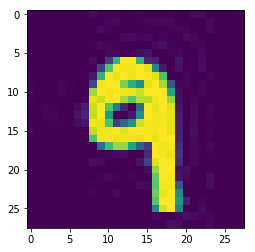

In [7]:
from random import shuffle
shuffle(images)
img = plt.imread(f'{PATH}test/{images[0]}')
plt.imshow(img)

# How computer see images? 

In [8]:
img[10:20, 10:20]

array([[250, 255, 250, 247, 233, 255, 255, 254, 153,  10],
       [254, 255, 220, 189, 226, 229, 249, 255, 212,  11],
       [187, 106,  28,   0,  89, 255, 247, 255, 241,  15],
       [141,   0,   1,  16, 124, 255, 250, 251, 247,  18],
       [183,  47,  83, 130, 239, 252, 250, 253, 245,  19],
       [250, 255, 245, 254, 255, 252, 251, 255, 247,  23],
       [255, 247, 249, 250, 247, 255, 246, 255, 255,  23],
       [176, 216, 215, 151,  74,  44, 255, 250, 251,  31],
       [  4,   6,   8,   0,   0,  30, 255, 251, 247,  39],
       [  0,   0,   1,   0,  13,  49, 244, 255, 253,  30]], dtype=uint8)

In [9]:
size = 24 # Size of image
arch = resnet34 # The model used
# Transformations
tfms = tfms_from_model(arch, size) # Transforming the data
data = ImageClassifierData.from_paths(PATH, tfms=tfms) # Reads the data and provides a dataset ready for use

In [10]:
# Create the Learner(Model)
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 132/132 [00:04<00:00, 28.34it/s]


In [11]:
learn.fit(0.01, 3) # Training with 3 epoches

epoch      trn_loss   val_loss   accuracy                     
    0      0.345961   0.228549   0.928537  
    1      0.308242   0.184283   0.940924                     
    2      0.264485   0.17465    0.943425                     



[0.17464951901790243, 0.9434254407428343]

In [12]:
learn.precompute = False # Turn off precompute to use data augmentation

In [13]:
learn.fit(1e-2, 3, cycle_len=1) # Training with 3 epoches

epoch      trn_loss   val_loss   accuracy                    
    0      0.244232   0.158692   0.947832  
    1      0.259274   0.160017   0.94819                     
    2      0.228952   0.158064   0.950214                    
    3      0.226351   0.14882    0.95081                     
    4      0.229888   0.150213   0.952358                    



[0.15021305635976132, 0.95235826589767]

In [14]:
# solve under fitting by giving the learner a longer look at the data
learn.fit(1e-2, 3, cycle_len=1, cycle_mult= 2)# 3 cycles(each has 1 epoch) with mult = 1 + 2 + 4 = 7 epoches

epoch      trn_loss   val_loss   accuracy                    
    0      0.219438   0.144096   0.952596  
    1      0.238587   0.137579   0.954979                    
    2      0.255102   0.148747   0.95474                     
    3      0.214474   0.142691   0.955693                    
    4      0.207266   0.132641   0.956408                    
    5      0.185441   0.134463   0.958909                    
    6      0.202423   0.12889    0.957361                    



[0.12888986232906594, 0.9573606479559813]

In [15]:
lrf = learn.lr_find() # Finding the best learning rate

 76%|███████▌  | 401/526 [00:08<00:02, 50.24it/s, loss=0.613]


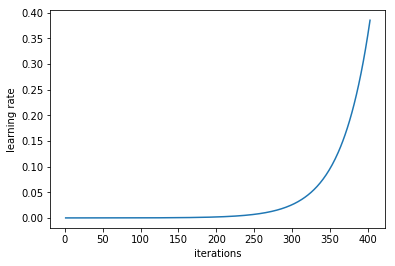

In [16]:
learn.sched.plot_lr()

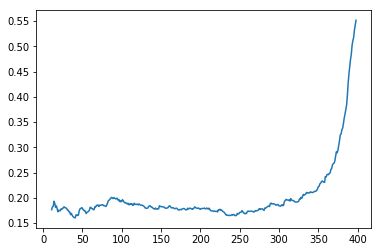

In [17]:
learn.sched.plot_loss()

In [18]:
lr = 0.2

In [33]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                     
    0      0.071708   0.042016   0.988209  
    1      0.142131   0.042714   0.988685                     
    2      0.119739   0.032085   0.990829                     
    3      0.094377   0.079274   0.977966                     
    4      0.165151   0.035825   0.989995                     
    5      0.086933   0.034455   0.989162                     
    6      0.116954   0.034041   0.990591                     
    7      0.233049   0.164284   0.953907                     
    8      0.111455   0.061149   0.984755                     
    9      0.071401   0.046313   0.987018                     
    10     0.122586   0.03299    0.990591                     
    11     0.169626   0.033998   0.991544                     
    12     0.106082   0.034749   0.991186                     
    13     0.141186   0.031347   0.991305                     
    14     0.08351    0.031658   0.991424                     



[0.0316583408293783, 0.9914244878513578]

In [20]:
# Differential learning rates
lrs = np.array([lr/9, lr/3, lr]) # Set a learning rate for each group of layers

In [21]:
learn.unfreeze() #unfreeze the earlier layers to train instead of the last one only

In [22]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                     
    0      0.142356   0.047213   0.985707  
    1      0.086781   0.042012   0.988447                     
    2      0.07959    0.029084   0.991782                     
    3      0.227912   0.073193   0.979871                     
    4      0.099006   0.034284   0.990829                     
    5      0.028586   0.026074   0.991901                     
    6      0.166515   0.023718   0.992973                     



[0.023718310430425868, 0.9929728442115293]

In [4]:
learn.save('All') # Saving 

NameError: name 'learn' is not defined

In [24]:
learn.load('All') # Loading

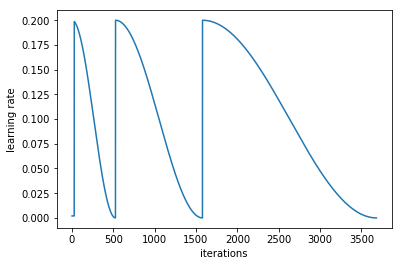

In [25]:
learn.sched.plot_lr() # The Change of Learning rate each cycle (SGDR)

In [26]:
log_preds, y = learn.TTA() # Test Time Augmentation, gives a better accuracy

In [27]:
probs = np.mean(np.exp(log_preds), 0)

# Accuracy 

In [28]:
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.9929728442115293, 0.023718375960983487)

In [29]:
# confusion matrix
preds = np.argmax(probs, axis=1)
probs = probs[:, 1]

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[825   0   0   1   0   0   0   0   0   0]
 [  0 934   0   0   0   0   0   2   0   0]
 [  0   0 832   0   0   0   0   2   1   0]
 [  0   0   2 863   0   3   0   0   0   2]
 [  1   0   1   0 803   0   1   4   0   4]
 [  0   0   1   3   0 753   0   1   1   0]
 [  1   0   0   2   1   0 823   0   0   0]
 [  0   3   2   1   0   0   0 873   0   1]
 [  1   0   0   2   0   1   2   1 804   1]
 [  0   0   0   0   8   1   0   1   0 827]]


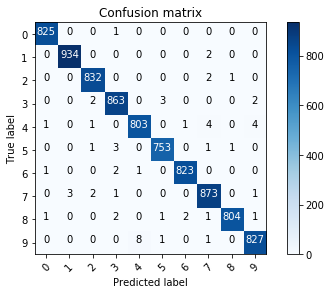

In [31]:
plot_confusion_matrix(cm, data.classes) # True Labels VS predicted Labels